In [14]:
import numpy as np                      # numpy este o biblioteca pt calcul numeric si stiintific (numerical python)
import pandas as pd                     # pandas este folosit pt manipularea datelor (filtrare, sortare, agregare)
import matplotlib.pyplot as plt         # biblioteca grafica (asemanator cu matlab)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

The data is taken from https://archive.ics.uci.edu/dataset/846/accelerometer
I will use the dataset to determin if and when a cooler fan with weights on its blades will fail due to the vibrations from the mass distributed weights.

wconfig: 1 - weights on 2 neighboring blades
         2 - weights at a 90 degrees angle
         3 - weights at on opposite blades

pctid: speed of the fan (from 20% power to 100%)

x & y & z: data from vibrations measured

In [15]:
data = pd.read_csv("accelerometer.csv")    # reading the full data
print(data)

        wconfid  pctid      x      y      z
0             1     20  1.004  0.090 -0.125
1             1     20  1.004 -0.043 -0.125
2             1     20  0.969  0.090 -0.121
3             1     20  0.973 -0.012 -0.137
4             1     20  1.000 -0.016 -0.121
...         ...    ...    ...    ...    ...
152995        3    100  1.051  0.090 -0.262
152996        3    100  0.918  0.039 -0.129
152997        3    100  1.156 -0.094 -0.227
152998        3    100  0.934  0.203 -0.172
152999        3    100  1.199 -0.176  0.109

[153000 rows x 5 columns]


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


array([[<Axes: title={'center': 'wconfid'}>,
        <Axes: title={'center': 'pctid'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

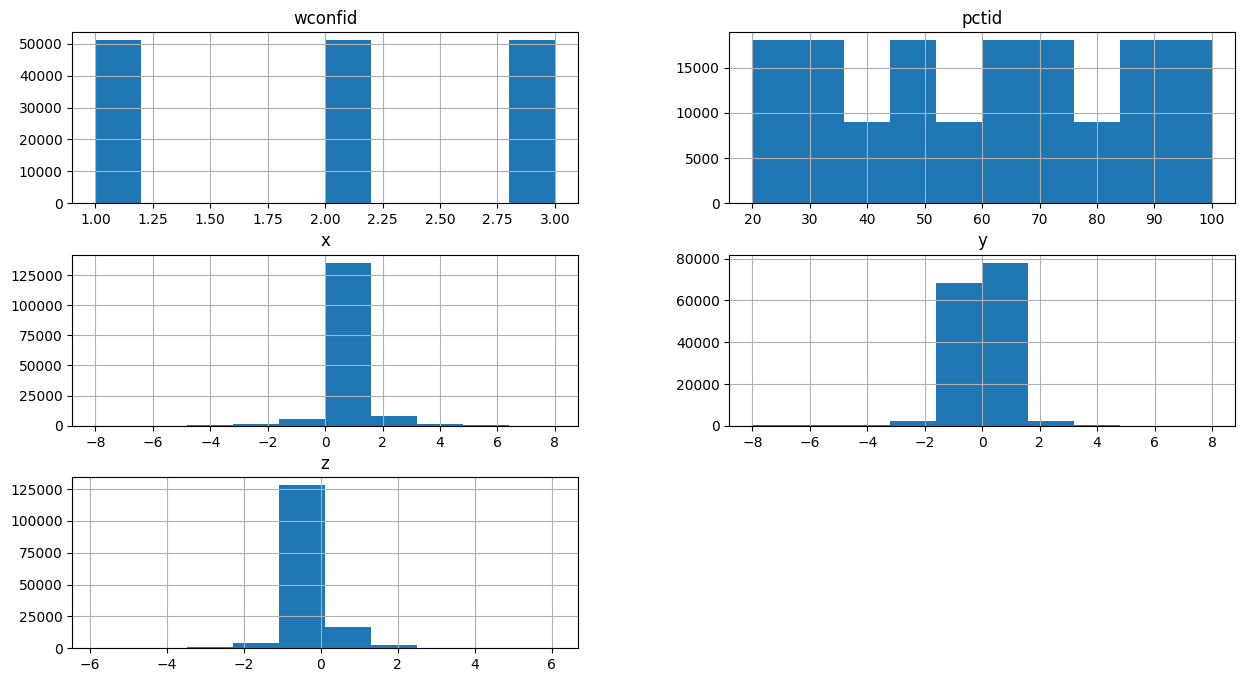

In [17]:
data.hist(figsize=(15,8))

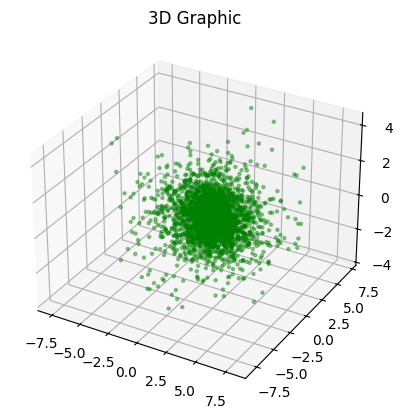

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')                                                          # matplot has only XoY, I add the Z as well with projection

data_sampled = data.sample(frac=0.1)                                                                # I keep only 10% of the data
ax.scatter(data_sampled['x'], data_sampled['y'], data_sampled['z'], c='green', s=5, alpha=0.4)      # s = size; alpha = transparancy
ax.set_title("3D Graphic")
plt.show()

In [19]:
data['vibration'] = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)                                                                     # formula for calculating vibrations

scaler = MinMaxScaler()                                                                                                                     # scaler between 0 and 1
data_scaled = pd.DataFrame(scaler.fit_transform(data[['vibration', 'wconfid', 'pctid']]), columns=['vibration', 'wconfid', 'pctid'])        # take and convert just the 3 columns

data_scaled['wear_score'] = 0.5 * data_scaled['vibration'] + 0.3 * data_scaled['wconfid'] + 0.2 * data_scaled['pctid']                      # came with this formula of the wear based on the 3 main factors
data_scaled['time_till_death']=(1-data_scaled['wear_score'])* np.random.uniform(100, 200)                                                   # same with the time until it fails
print(data_scaled)

        vibration  wconfid  pctid  wear_score  time_till_death
0        0.095588      0.0    0.0    0.047794       148.173860
1        0.095283      0.0    0.0    0.047642       148.197592
2        0.092116      0.0    0.0    0.046058       148.444027
3        0.092315      0.0    0.0    0.046157       148.428573
4        0.094764      0.0    0.0    0.047382       148.237974
...           ...      ...    ...         ...              ...
152995   0.102631      1.0    1.0    0.551315        69.820351
152996   0.086888      1.0    1.0    0.543444        71.045243
152997   0.112026      1.0    1.0    0.556013        69.089346
152998   0.091175      1.0    1.0    0.545588        70.711645
152999   0.115482      1.0    1.0    0.557741        68.820432

[153000 rows x 5 columns]


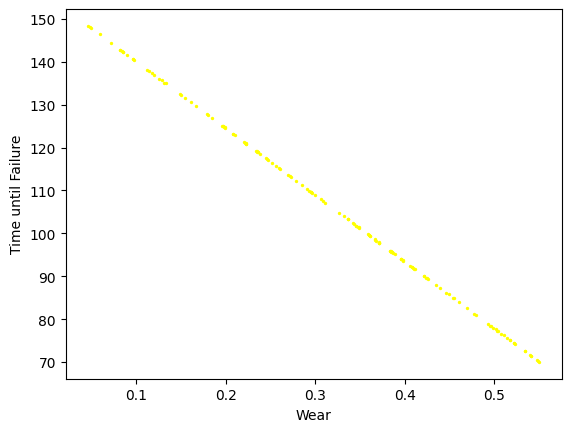

        wear_score  time_till_death
0         0.047794       148.173860
1         0.047642       148.197592
2         0.046058       148.444027
3         0.046157       148.428573
4         0.047382       148.237974
...            ...              ...
152995    0.551315        69.820351
152996    0.543444        71.045243
152997    0.556013        69.089346
152998    0.545588        70.711645
152999    0.557741        68.820432

[153000 rows x 2 columns]


In [20]:
print_needed_data = pd.DataFrame(data_scaled, columns=['wear_score', 'time_till_death'])                                 # simplified the data I need for my graph
scatter_sampled = print_needed_data.sample(frac=0.001)                                                                   # I keep only 0.1% of the data

plt.scatter(scatter_sampled['wear_score'],scatter_sampled['time_till_death'], color='yellow', s=2)

plt.xlabel("Wear")
plt.ylabel("Time until Failure")
plt.show()
print(print_needed_data)

In [21]:
train_data, valid_data, test_data = np.split(data_scaled.sample(frac=1), [int (0.4*len(data_scaled)),int (0.7*len(data_scaled))])

# 40% of the data will be the training data
# from 40% to 70% (30%) will be my validation data
# the rest of 30% will be the testing data

print(train_data)

        vibration  wconfid   pctid  wear_score  time_till_death
22714    0.106578      0.0  0.4375    0.140789       133.702831
126732   0.093140      1.0  0.5000    0.446570        86.119855
43561    0.289607      0.0  0.8750    0.319803       105.846180
133585   0.093267      1.0  0.6250    0.471633        82.219729
31676    0.097414      0.0  0.6250    0.173707       128.580457
...           ...      ...     ...         ...              ...
145959   0.091706      1.0  0.8750    0.520853        74.560625
29458    0.105437      0.0  0.5625    0.165219       129.901321
108708   0.092216      1.0  0.1250    0.371108        97.862655
10371    0.093446      0.0  0.1875    0.084223       142.505131
44871    0.173255      0.0  0.8750    0.261628       114.898978

[61200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


The best algorithm for this type of problem is Neural Network, because we do not have the time until failure measured. So it is not a regression or a classification problem, to have an output known.
For this solution, I will use TensorFlow, because it is an open source library with the hidden layers already trained.

In [22]:
import tensorflow as tf

In [23]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')  # sau 'Mean Absolute Error', după caz
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_mae(history):
    plt.plot(history.history['mae'], label='MAE (train)')
    plt.plot(history.history['val_mae'], label='MAE (val)')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)
    plt.show()
    


In [24]:
model = tf.keras.Sequential([

    tf.keras.layers.Dense(8, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
X_train = train_data [['vibration', 'wconfid','pctid']]

scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(train_data[['time_till_death']])

history = model.fit(
    X_train, y_train, epochs=50, batch_size=1024, validation_split=0.2, verbose=1
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0538 - mae: 0.1951 - val_loss: 0.0469 - val_mae: 0.1825
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0474 - mae: 0.1813 - val_loss: 0.0418 - val_mae: 0.1709
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0429 - mae: 0.1717 - val_loss: 0.0371 - val_mae: 0.1605
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0379 - mae: 0.1608 - val_loss: 0.0321 - val_mae: 0.1496
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0331 - mae: 0.1499 - val_loss: 0.0272 - val_mae: 0.1377
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0286 - mae: 0.1387 - val_loss: 0.0227 - val_mae: 0.1256
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250 - mae: 0.1286 - val_loss: 0.0188 - val_mae: 0.1138
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mae: 0.1183 - val_loss: 0.0156 - val_mae: 0.1030
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 - mae: 

1913/1913 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step


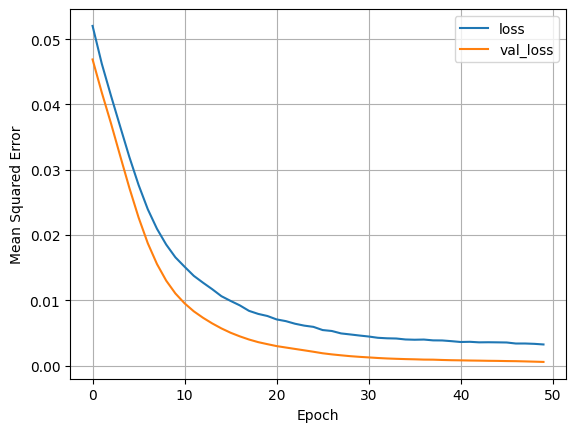

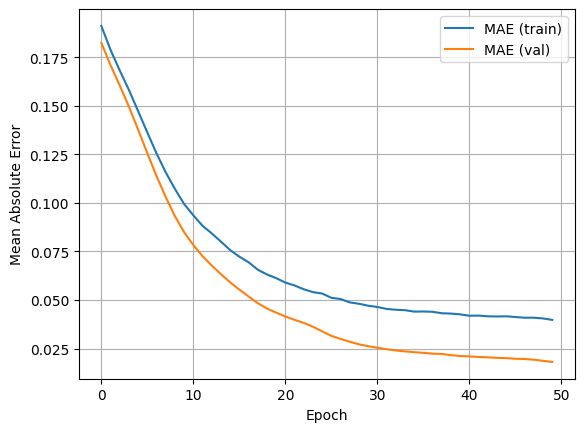

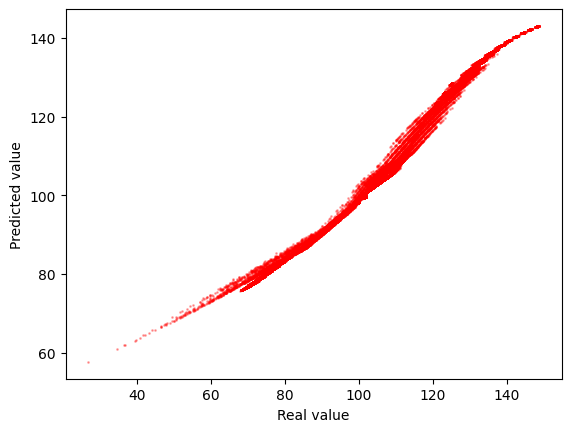

In [26]:
# 1. Obține predicțiile modelului
y_pred_scaled = model.predict(X_train)

# 2. Inversează scala pentru predicțiile obținute
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Acum, `y_pred` va conține valorile în unitățile originale ale 'time_till_death'.


plot_loss(history)
plot_mae(history)

plt.scatter(train_data['time_till_death'],y_pred,color='red',s=1,alpha=0.3)
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.show()